## Set UP

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
%pip install wbdata
import wbdata
%pip install cufflinks
import cufflinks as cf
cf.go_offline()

Note: you may need to restart the kernel to use updated packages.
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.


## 1. [A] Population Statistics
A python function named population that will deliver information to answer the queries of the following form:

In [year] how many [people/males/females] aged [low] to [high] were living in [the world/region/country]? 

The function population(year, sex, age_range, place_code) returns a population count given a year, sort of person, age range, and place.

In [13]:
SOURCE = 40 # "Population estimates and projections

indicators = wbdata.get_indicator(source=SOURCE)

indicators

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

### Search Place Code
The following is the example to search the place code for 'world'.

In [11]:
##change the term 'world' in the function to search the code for the place/region/country that you are interested in
wbdata.search_countries("World")

id    name
----  ----------
ARB   Arab World
WLD   World

### Variables Clarification

population(year, sex, age_range, place_code):
<br>
year: 1960 to 2050 (projections)
<br>
sex: "male"/ "female"/ "all"
<br>
age_range: accepts a list of two integers which will be rounded to nearest multiplers of 5; and includes first rounded integer but exludes the second (ex. [0, 8] aging from 0 inclusive to 10 exclusive)
<br>
place_code: accepts country/region/place code


In [12]:
"""
population age ranges available from dataset:
00-04, 05-09, 10-14, 15-19, 20-24, 25-29, 30-34, ..., 70-74, 75-79, above 80
"""

def population_df(year=2000, sex='male', age_range=[1, 61], place_code='WLD'):
    ##get all five-year age groups from rounded age_range 
    age_range=age_list(age_range)
    if sex == "male":
        male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
        variables = male_variables
    elif population == "female":
        female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
        variables = female_variables
    else:
        male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
        female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
        variables = male_variables
        variables.update(female_variables)
    population = wbdata.get_dataframe(variable_labels, country=place_code)   
##age_list function returns a list of five-year age group strings from rounded age_range       
def age_list(age_range):
    #round age_range to nearst multiples of five 
    def round_age(age_range):
        for i in range(0,2):
            if 0<age_range[i]%5<3:
                age_range[i]-=age_range[i]%5
                i+=1
            elif age_range[i]%5>=3:
                age_range[i]+=(5-age_range[i]%5)
                i+=1
            else:
                i+=1
        return age_range
    results = []
    age_lb, age_ub = round_age(age_range) 
    while age_lb < min(79, age_ub):
        results.append("{:02d}{:02d}".format(age_lb, age_lb + 4))
        age_lb += 5
    if age_lb >= 80:
        results.append('80UP')
    return results   

IndentationError: expected an indented block (3034895810.py, line 2)

In [13]:
variable_labels = {
              "SP.RUR.TOTL":"Rural population",
              "SP.URB.TOTL":"Urban population",
              "SP.POP.1564.MA.IN":"Male",
              "SP.POP.TOTL.FE.IN":"Female",
              "SP.POP.TOTL":"Total Population"}
kor_population = wbdata.get_dataframe(variable_labels, country="KOR")
kor_population.head()

,Rural population,Urban population,Male,Female,Total Population
date,,,,,
2022,9588890.0,42039227.0,18789667.0,25854364.0,51628117.0
2021,9617303.0,42127573.0,18966173.0,25902500.0,51744876.0
2020,9634283.0,42201956.0,19138302.0,25938911.0,51836239.0
2019,9612727.0,42152095.0,19234757.0,25889856.0,51764822.0
2018,9564386.0,42020672.0,19251079.0,25783018.0,51585058.0


In [65]:
# Give variable for clarity
variable_labels = {
              "SP.RUR.TOTL":"Rural population",
              "SP.URB.TOTL":"Urban population",
              "SP.POP.1564.MA.IN":"Male",
              "SP.POP.TOTL.FE.IN":"Female",
              "SP.POP.TOTL":"Total Population"}
kor_population = wbdata.get_dataframe(variable_labels, country="KOR")

kor_population.head()

,Rural population,Urban population,Male,Female,Total Population
date,,,,,
2022,9588890.0,42039227.0,18789667.0,25854364.0,51628117.0
2021,9617303.0,42127573.0,18966173.0,25902500.0,51744876.0
2020,9634283.0,42201956.0,19138302.0,25938911.0,51836239.0
2019,9612727.0,42152095.0,19234757.0,25889856.0,51764822.0
2018,9564386.0,42020672.0,19251079.0,25783018.0,51585058.0


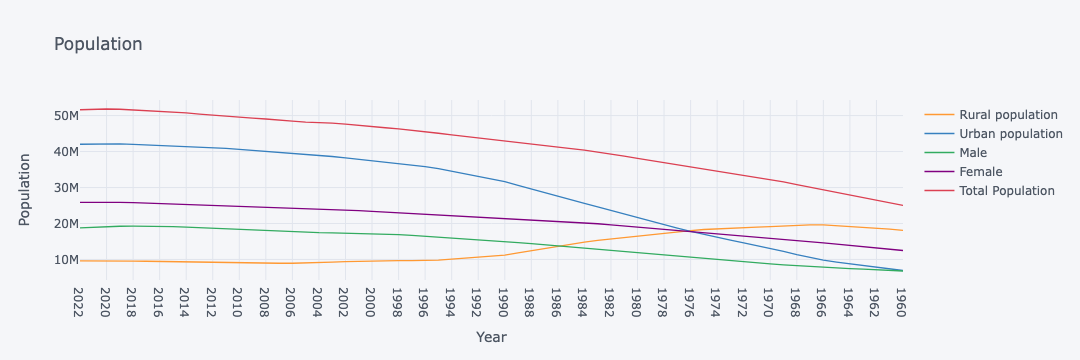

In [67]:
kor_population.iplot(title="Population",xTitle='Year',yTitle='Population')